<a href="https://colab.research.google.com/github/Saransh-khandelwal-123/CODSOFT-ML/blob/main/MOVIE_RATING_PREDICTION_by_SARANSH_KHANDELWAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**MOVIE RATING PREDICTION**

##IMPORT REQUIRED LIBRARIES

In [ ]:
import numpy as np
import pandas as pd
import chardet
from sklearn.svm import SVC, LinearSVC
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

##Exploratory data analysis

###Load and prepare data

In [ ]:
# Function to detect encoding
def detect_encoding(file_path):
    with open(file_path, 'rb') as f:
        result = chardet.detect(f.read())
    return result['encoding']

# Read the files using detected encoding
movie_encoding = detect_encoding('../content/drive/MyDrive/Colab Notebooks/movies.dat')
rating_encoding = detect_encoding('../content/drive/MyDrive/Colab Notebooks/ratings.dat')
user_encoding = detect_encoding('../content/drive/MyDrive/Colab Notebooks/users.dat')

df_movie = pd.read_csv('../content/drive/MyDrive/Colab Notebooks/movies.dat', sep='::', engine='python', encoding=movie_encoding)
df_rating = pd.read_csv('../content/drive/MyDrive/Colab Notebooks/ratings.dat', sep='::', engine='python', encoding=rating_encoding)
df_user = pd.read_csv('../content/drive/MyDrive/Colab Notebooks/users.dat', sep='::', engine='python', encoding=user_encoding)

##Data analysis

###Data Analysis for movie

In [ ]:
df_movie.columns =['MovieIDs','MovieName','Category']
df_movie.dropna(inplace=True)
df_movie.head()

,MovieIDs,MovieName,Category
0,2,Jumanji (1995),Adventure|Children's|Fantasy
1,3,Grumpier Old Men (1995),Comedy|Romance
2,4,Waiting to Exhale (1995),Comedy|Drama
3,5,Father of the Bride Part II (1995),Comedy
4,6,Heat (1995),Action|Crime|Thriller


In [ ]:
df_movie.info

<bound method DataFrame.info of       MovieIDs                           MovieName  \
0            2                      Jumanji (1995)   
1            3             Grumpier Old Men (1995)   
2            4            Waiting to Exhale (1995)   
3            5  Father of the Bride Part II (1995)   
4            6                         Heat (1995)   
...        ...                                 ...   
3877      3948             Meet the Parents (2000)   
3878      3949          Requiem for a Dream (2000)   
3879      3950                    Tigerland (2000)   
3880      3951             Two Family House (2000)   
3881      3952               Contender, The (2000)   

                          Category  
0     Adventure|Children's|Fantasy  
1                   Comedy|Romance  
2                     Comedy|Drama  
3                           Comedy  
4            Action|Crime|Thriller  
...                            ...  
3877                        Comedy  
3878                   

###Data Analysis for rating

In [ ]:
df_rating.columns =['ID','MovieID','Ratings','TimeStamp']
df_rating.dropna(inplace=True)
df_rating.head()

,ID,MovieID,Ratings,TimeStamp
0,1,661,3,978302109.0
1,1,914,3,978301968.0
2,1,3408,4,978300275.0
3,1,2355,5,978824291.0
4,1,1197,3,978302268.0


In [ ]:
df_rating.info

<bound method DataFrame.info of           ID  MovieID  Ratings    TimeStamp
0          1      661        3  978302109.0
1          1      914        3  978301968.0
2          1     3408        4  978300275.0
3          1     2355        5  978824291.0
4          1     1197        3  978302268.0
...      ...      ...      ...          ...
176213  1114     3004        1  974915102.0
176214  1114        7        5  974915968.0
176215  1114     3948        2  974915017.0
176216  1114     1408        2  974915690.0
176217  1114     2065        3  974915894.0

[176218 rows x 4 columns]>

###Data Analysis for user

In [ ]:
df_user.columns =['UserID','Gender','Age','Occupation','Zip-code']
df_user.dropna(inplace=True)
df_user.head()

,UserID,Gender,Age,Occupation,Zip-code
0,2,M,56,16,70072
1,3,M,25,15,55117
2,4,M,45,7,02460
3,5,M,25,20,55455
4,6,F,50,9,55117


In [ ]:
df_user.info

<bound method DataFrame.info of       UserID Gender  Age  Occupation Zip-code
0          2      M   56          16    70072
1          3      M   25          15    55117
2          4      M   45           7    02460
3          5      M   25          20    55455
4          6      F   50           9    55117
...      ...    ...  ...         ...      ...
6034    6036      F   25          15    32603
6035    6037      F   45           1    76006
6036    6038      F   56           1    14706
6037    6039      F   45           0    01060
6038    6040      M   25           6    11106

[6039 rows x 5 columns]>

In [ ]:
# Add genre popularity column
genre_counts = df_movie['Category'].value_counts()
df_movie['genre_popularity'] = df_movie['Category'].apply(lambda x: genre_counts[x])

In [ ]:

#Drop unused columns
df_movie = df_movie.drop(['MovieIDs', 'MovieName'], axis=1)

In [ ]:
df = pd.concat([df_movie, df_rating,df_user], axis=1)
df.head()

,Category,genre_popularity,ID,MovieID,Ratings,TimeStamp,UserID,Gender,Age,Occupation,Zip-code
0,Adventure|Children's|Fantasy,11.0,1,661,3,978302109.0,2.0,M,56.0,16.0,70072
1,Comedy|Romance,142.0,1,914,3,978301968.0,3.0,M,25.0,15.0,55117
2,Comedy|Drama,162.0,1,3408,4,978300275.0,4.0,M,45.0,7.0,02460
3,Comedy,521.0,1,2355,5,978824291.0,5.0,M,25.0,20.0,55455
4,Action|Crime|Thriller,6.0,1,1197,3,978302268.0,6.0,F,50.0,9.0,55117


In [ ]:
df.columns

Index(['Category', 'genre_popularity', 'ID', 'MovieID', 'Ratings', 'TimeStamp',
       'UserID', 'Gender', 'Age', 'Occupation', 'Zip-code'],
      dtype='object')

##DATA VISUALIZTION

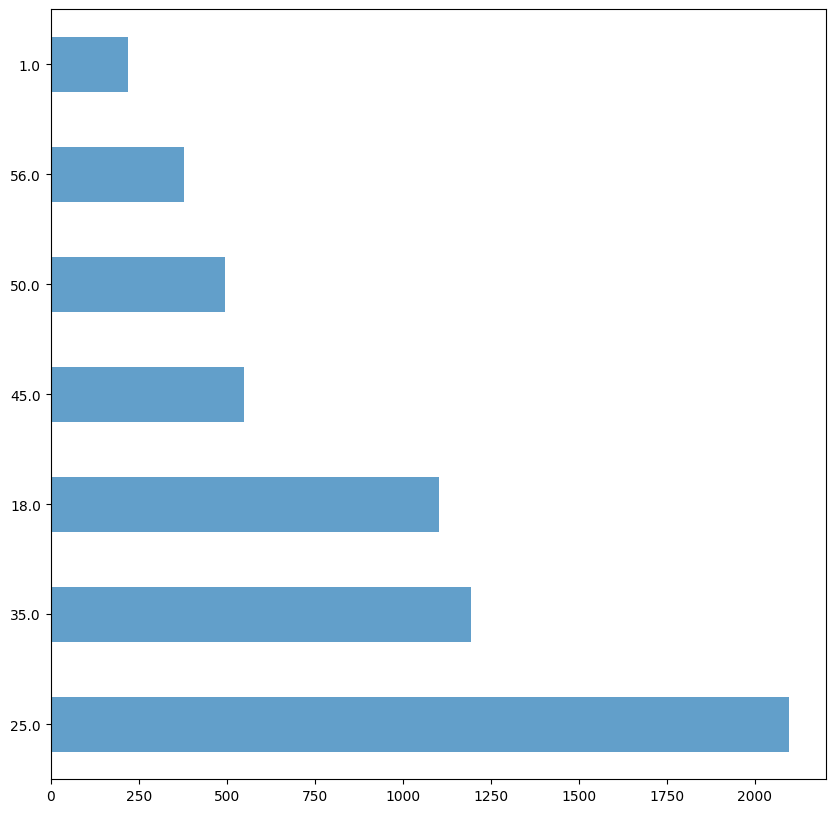

In [ ]:
#Visualize user age distribution
df['Age'].value_counts().plot(kind='barh',alpha=0.7,figsize=(10,10))
plt.show()

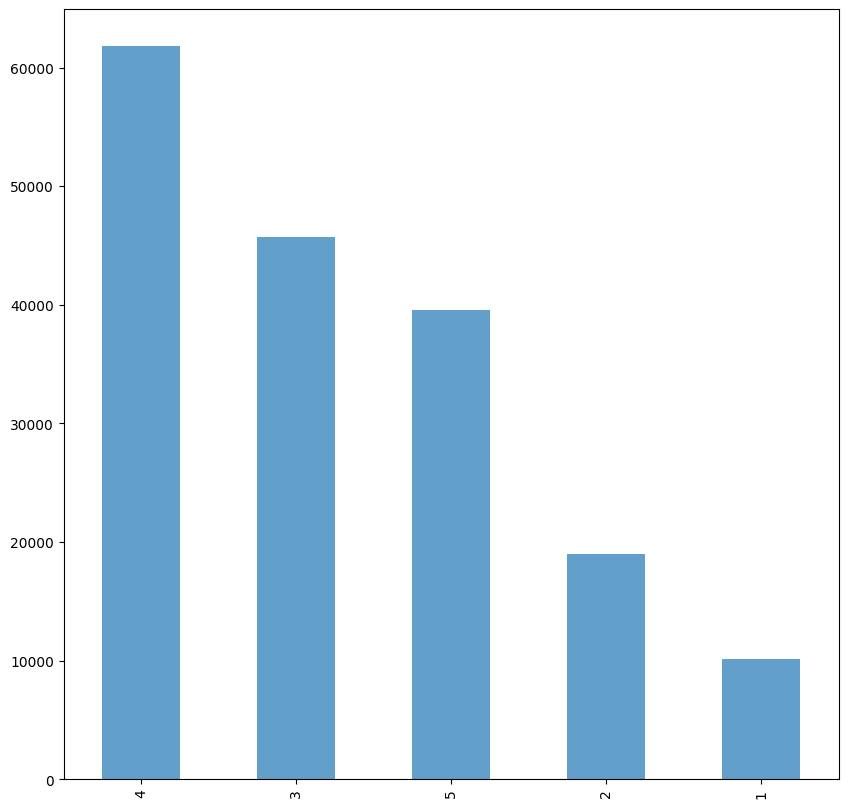

In [ ]:
#Visualize overall rating by users
df['Ratings'].value_counts().plot(kind='bar',alpha=0.7,figsize=(10,10))
plt.show()

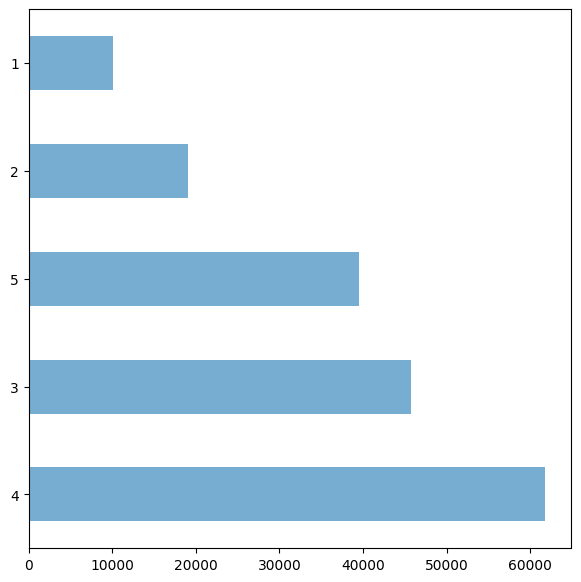

In [ ]:
#Find and visualize the top 10 movies by viewership rating
top_10 = df[10:]
top_10['Ratings'].value_counts().plot(kind='barh',alpha=0.6,figsize=(7,7))
plt.show()

Text(0.5, 0, 'Ratings')

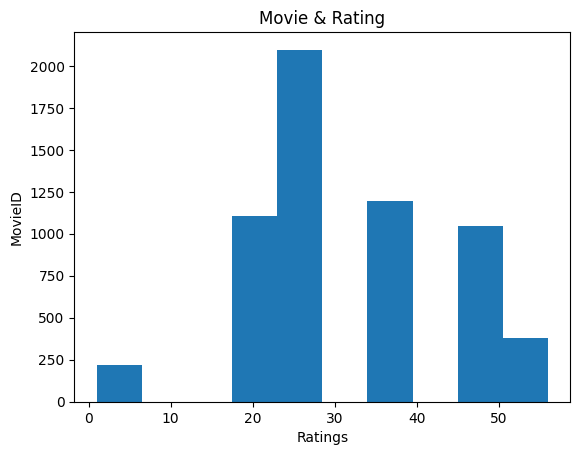

In [ ]:
#Create a histogram for movie
df.Age.plot.hist(bins=10)
plt.title("Movie & Rating")
plt.ylabel('MovieID')
plt.xlabel('Ratings')

Text(0.5, 0, 'Ratings')

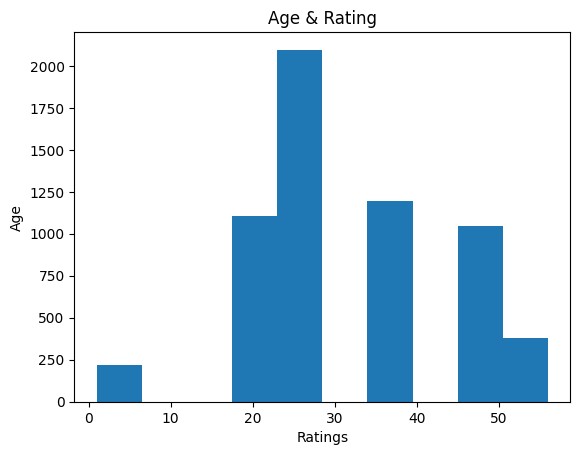

In [ ]:
#Create a histogram for age
df.Age.plot.hist(bins=10)
plt.title("Age & Rating")
plt.ylabel('Age')
plt.xlabel('Ratings')

In [ ]:
df.isnull().sum()

Category            172336
genre_popularity    172336
ID                       0
MovieID                  0
Ratings                  0
TimeStamp                0
UserID              170179
Gender              170179
Age                 170179
Occupation          170179
Zip-code            170179
dtype: int64

In [ ]:
df['Age'] = df['Age'].fillna(df['Age'].mean())
print(df['Age'])

0         56.000000
1         25.000000
2         45.000000
3         25.000000
4         50.000000
            ...    
176213    30.644146
176214    30.644146
176215    30.644146
176216    30.644146
176217    30.644146
Name: Age, Length: 176218, dtype: float64


In [ ]:
# Separate features (X) and target variable (y)
X = df[['MovieID']]
y = df['Ratings']
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Model training - Linear Regression
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
# Make predictions
y_pred_linear = linear_reg.predict(X_test)
# Model training - Random Forest Regression
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, y_train)
# Make predictions
y_pred_rf = rf_reg.predict(X_test)
# Evaluate the models
mse_linear = mean_squared_error(y_test, y_pred_linear)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_linear = r2_score(y_test, y_pred_linear)
r2_rf = r2_score(y_test, y_pred_rf)
print("Linear Regression - MSE:", mse_linear*100, "R-squared:", r2_linear*100)
print("Random Forest Regression - MSE:", mse_rf*100, "R-squared:", r2_rf*100)

Linear Regression - MSE: 125.8298345192753 R-squared: 0.3002981936545357
Random Forest Regression - MSE: 98.8208440647612 R-squared: 21.700535305092437
